In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import data, io, filters, segmentation, color
from skimage.io import imread_collection

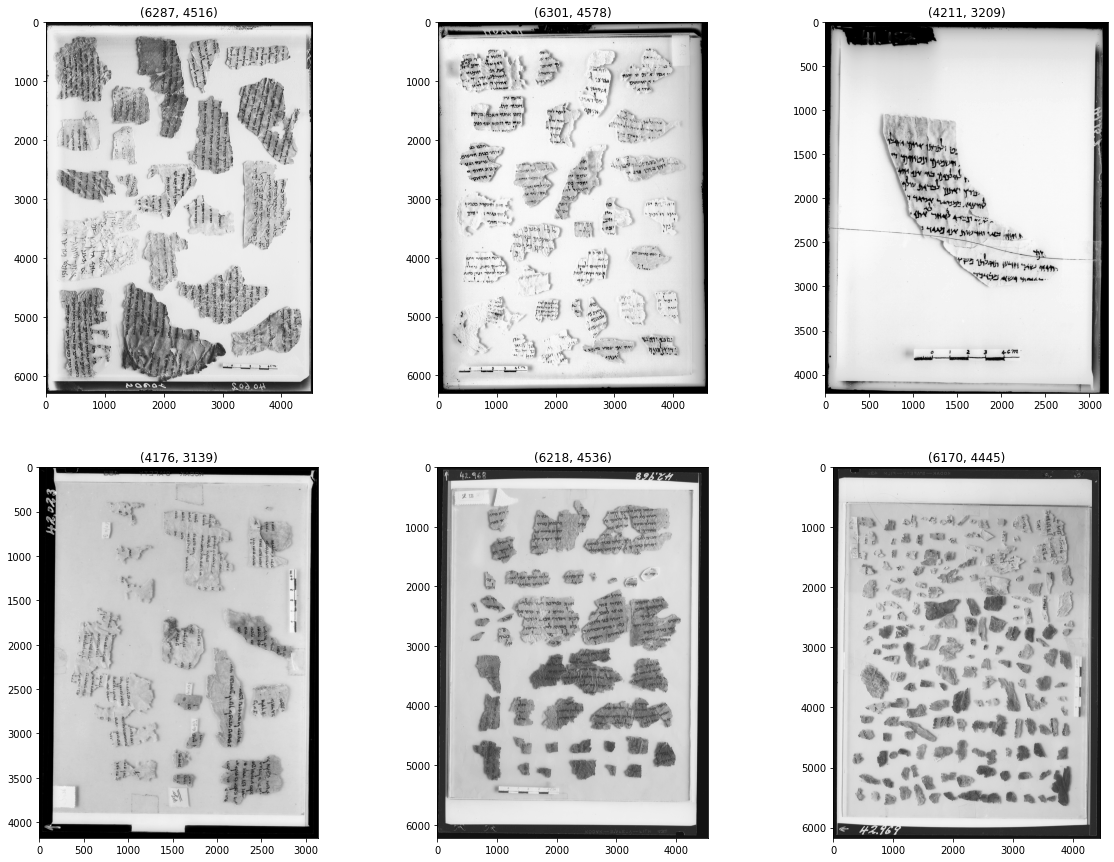

In [2]:
#read data


images_collection = imread_collection('data/*')

num_of_images=len(images_collection)
images = []
plt.figure(figsize=(20, 15))
for (image,i) in zip (images_collection,range(1,num_of_images+1)):

    if image.shape[0] < image.shape[1]:
        image = np.rot90(image)
    images.append(image)
    
    plt.subplot(int(np.ceil(num_of_images/3)),3,i)
    plt.title(image.shape)
    plt.imshow(image,cmap="gray")


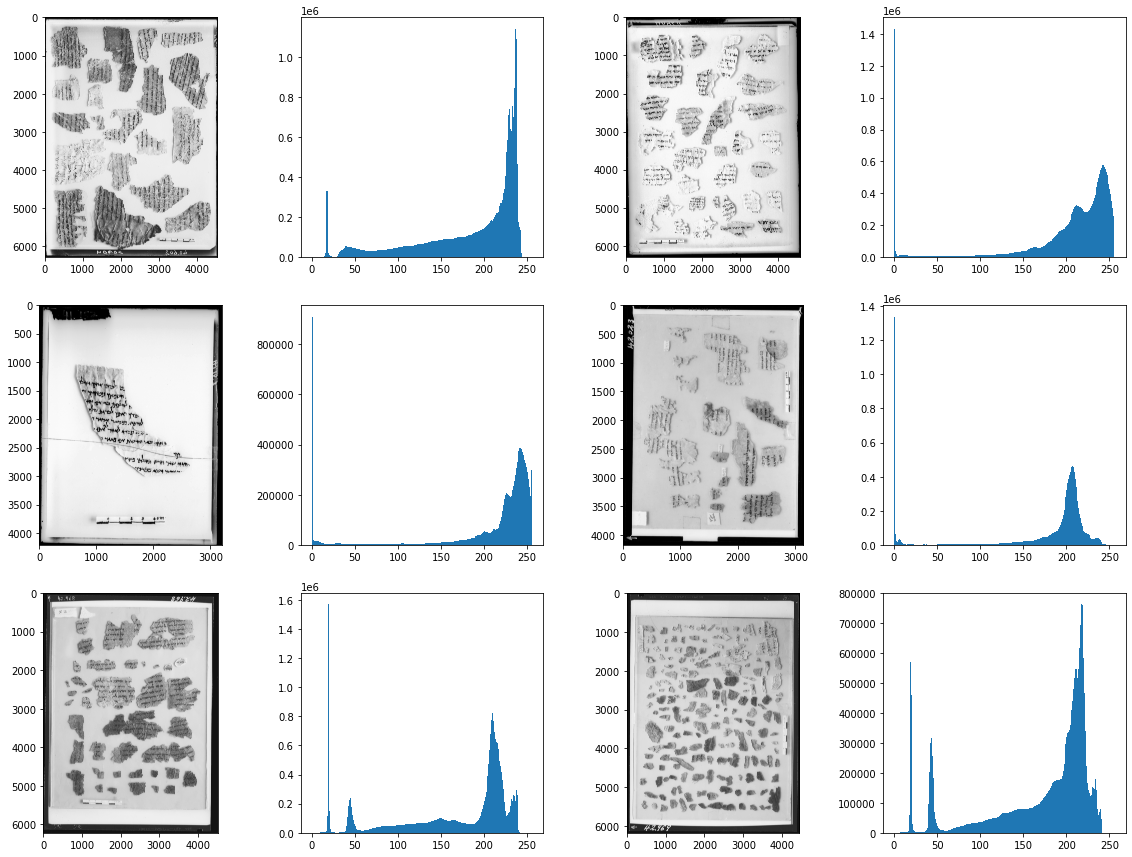

In [3]:
#show images histograms

plt.figure(figsize=(20, 15))

for (image,i) in zip (images,range(1,num_of_images+1)):
    
    plt.subplot(int(np.ceil(num_of_images/2)),4,2*i-1)
    plt.imshow(image,cmap='gray')
    plt.subplot(int(np.ceil(num_of_images/2)),4,2*i)
    plt.hist(image.ravel(),256,[0,256]); 

In [4]:
def dilation(image):
    kernel7 = np.ones((7, 7)).astype(np.uint8)
    kernel7[0:2,0:2] = [[0, 0], [0, 1]]
    kernel7[0:2,5:7] = [[0, 0], [1, 0]]
    kernel7[5:7,0:2] = [[0, 1], [0, 0]]
    kernel7[5:7,5:7] = [[1, 0], [0, 0]]
    kernel7 = 1 - kernel7
    dilate7 = cv2.dilate(image, kernel7, iterations=1)
    return dilate7

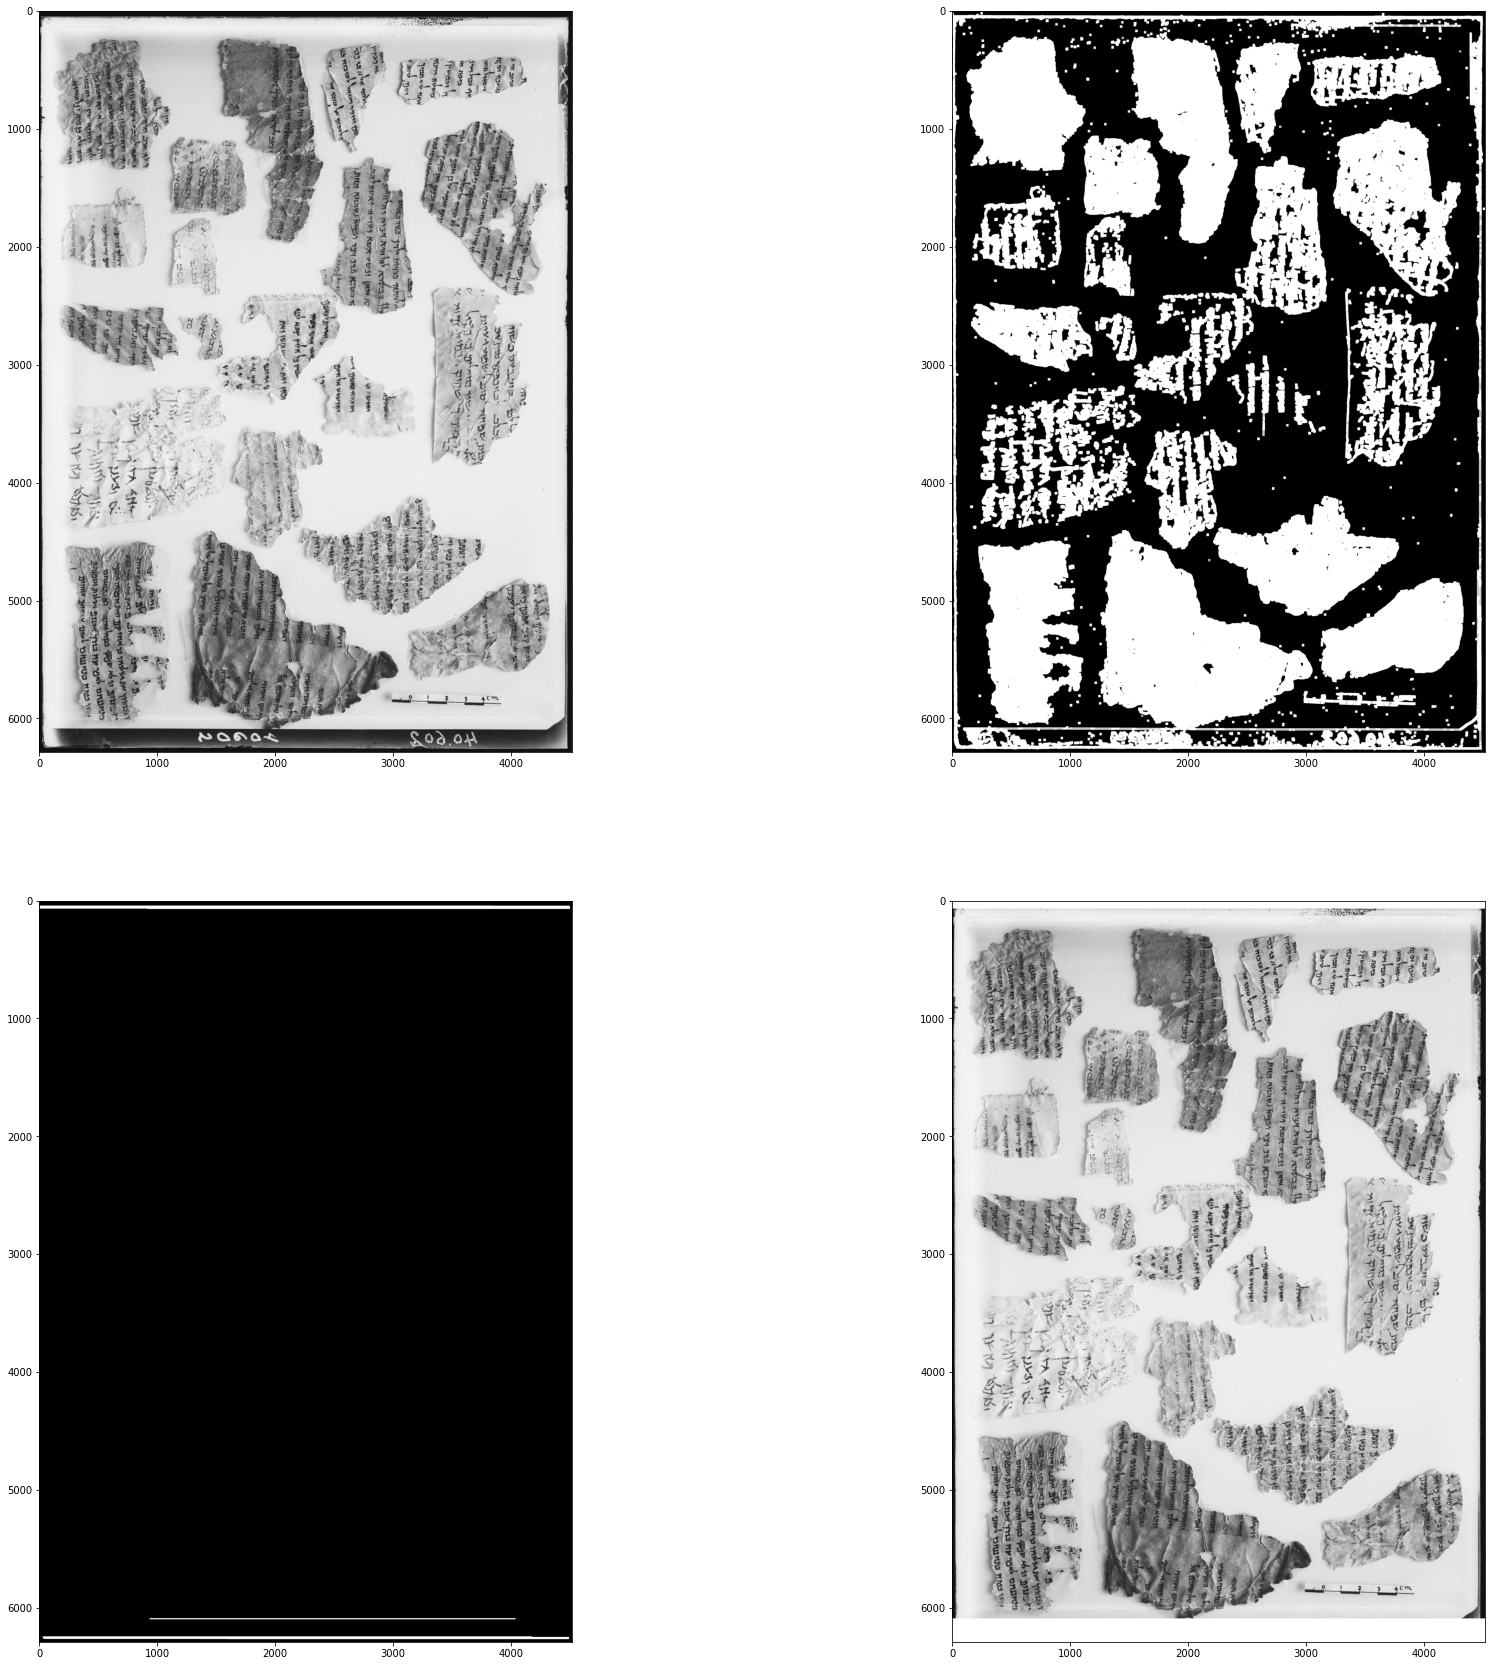

In [5]:

def clear_margins(image, show_analytics=False):

    th_first = 25
    th_second = 150

    out2 = image.copy()
    out3 = image.copy()
    out2*=0
    out3*=0

    out1 = cv2.Canny(image, th_first, th_second, apertureSize=3, L2gradient=False)
    out1 = dilation(dilation(dilation(out1)))
    lines = cv2.HoughLinesP(out1, 1, np.pi/180, 240,  minLineLength=2500, maxLineGap=50)
    if lines is None or len(lines) < 4:
        return -1
    rel_lines = lines[0:4].copy()
    rel_lines *= 0
    rel_lines -= 1

    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if np.abs(y1-y2) < 75: 
            cv2.line(out3, (x1, y1), (x2, y2), (255, 0, 0), 3)
            if (y1 < 1000):
                x1_, y1_, x2_, y2_ = rel_lines[0][0]
                if(y1 > y1_ or y1_ == -1):
                    rel_lines[0] = line
            elif (y1 > image.shape[0]-1000):
                x1_, y1_, x2_, y2_ = rel_lines[1][0]
                if(y1 < y1_ or y1_ == -1):
                    rel_lines[1] = line  
        # if (np.abs(x1-x2) < 75):
        #     cv2.line(out3, (x1, y1), (x2, y2), (255, 0, 0), 3)
        #     if (x1 < 500):
        #         x1_, y1_, x2_, y2_ = rel_lines[2][0]
        #         if(x1 > x1_ or x1_ == -1):
        #             rel_lines[2] = line
        #     elif (x1 > image.shape[1]-500):
        #         x1_, y1_, x2_, y2_ = rel_lines[3][0]
        #         if(x1 < x1_ or x1_ == -1):
        #             rel_lines[3] = line 


    

    x1_, y1_, x2_, y2_ = rel_lines[0][0]
    out2[:y1_, :] = 255
    x1_, y1_, x2_, y2_ = rel_lines[1][0]
    out2[y1_:, :] = 255
    x1_, y1_, x2_, y2_ = rel_lines[2][0]
    out2[:, :x1_] = 255
    x1_, y1_, x2_, y2_ = rel_lines[3][0]
    out2[:, x1_:] = 255

    if show_analytics:
        plt.figure(figsize=(30, 30))
        plt.subplot(2, 2, 1)
        plt.imshow(image, cmap="gray")

        plt.subplot(2, 2, 2)
        plt.imshow(out1, cmap="gray")

        plt.subplot(2, 2, 3)
        plt.imshow(out3, cmap="gray")

        plt.subplot(2, 2, 4)
        plt.imshow(np.bitwise_or(image, out2), cmap="gray")


    # return np.bitwise_or(image, out2) 
    return out3

i = clear_margins(images[0], True)

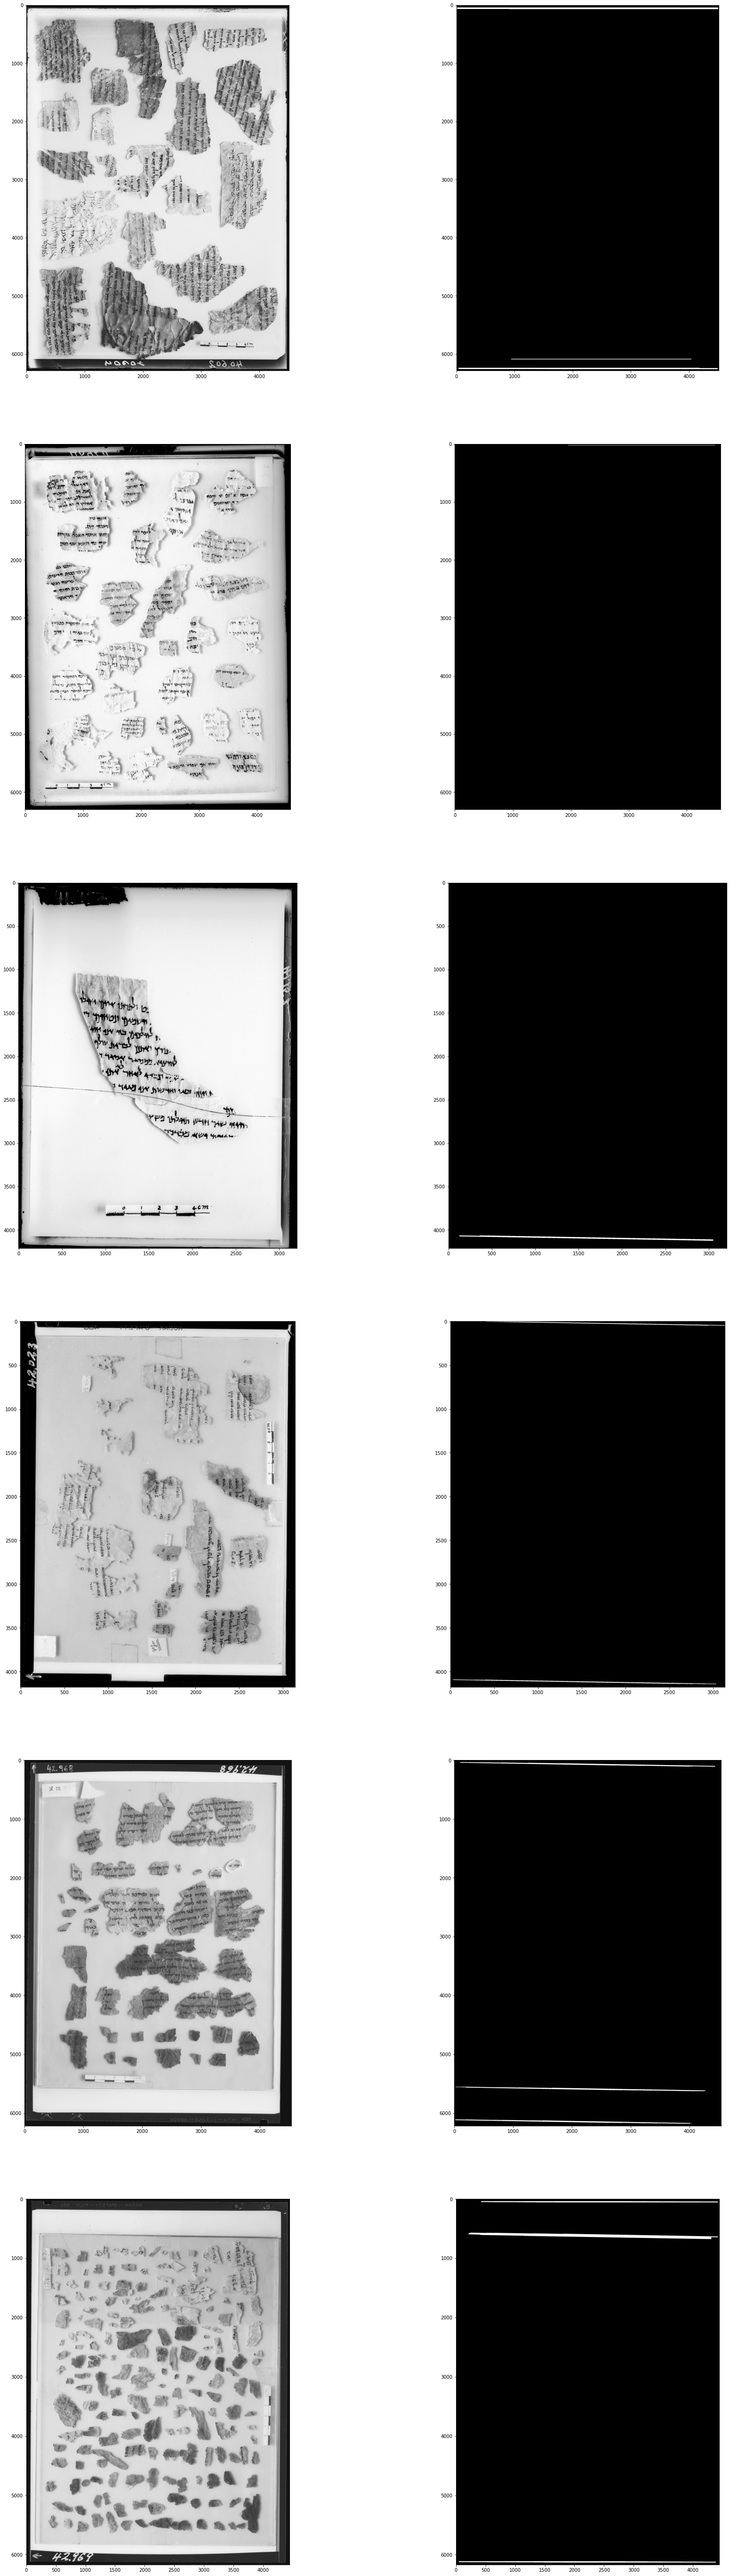

In [6]:

plt.figure(figsize=(30, 100))

for (image,i) in zip (images,range(1,num_of_images+1)):

    # th_first = 50
    # th_second = 150
    # out1 = cv2.Canny(image, th_first, th_second, apertureSize=3, L2gradient=False)
    # out1 = dilation(dilation(dilation(out1)))
    
    plt.subplot(num_of_images,2,2*i-1)
    plt.imshow(image,cmap='gray')
    plt.subplot(num_of_images,2,2*i)
    plt.imshow(clear_margins(image),cmap='gray')


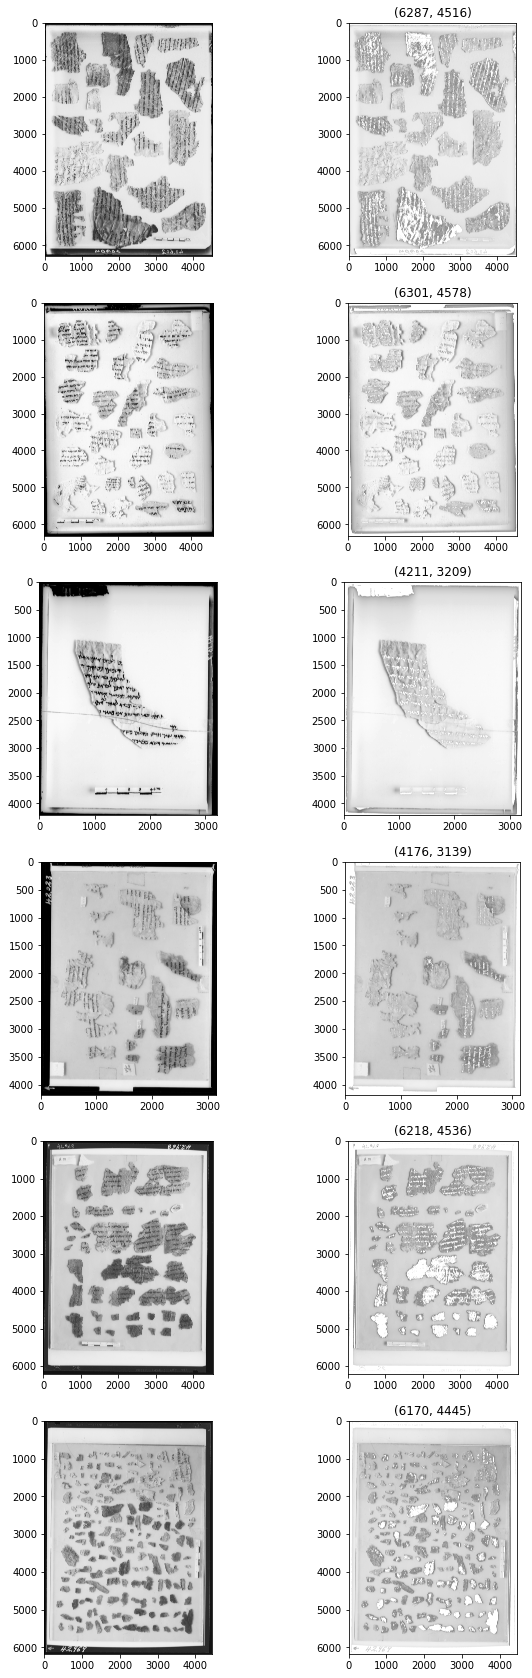

In [33]:
th_back_black=0
th_back_white=0

th_back_black=0

plt.figure(figsize=(10, 30))
th_images=[]
for (image,i) in zip (images,range(1,num_of_images+1)):
    plt.subplot(num_of_images, 2, 2*i-1)
    plt.imshow(image,cmap="gray")
    
    hist, bins = np.histogram(image,bins=range(256)); 
    th_back_black = np.argmax(hist[0:50]) + 100
    th_back_white =  np.argmax(hist[200:255]) + 150
    # print(th_back_black, th_back_white)
    image[image < th_back_black] = 255
    image[0,0] = 0
    plt.subplot(num_of_images, 2, 2*i)
    plt.title(image.shape)
    plt.imshow(image,cmap="gray")
    th_images.append(image)

In [ ]:
kernel7 = np.ones((7, 7)).astype(np.uint8)
kernel7[0:2,0:2] = [[0, 0], [0, 1]]
kernel7[0:2,5:7] = [[0, 0], [1, 0]]
kernel7[5:7,0:2] = [[0, 1], [0, 0]]
kernel7[5:7,5:7] = [[1, 0], [0, 0]]
kernel7 = 1 - kernel7


def find_edges(img):

    kernel7 = np.ones((7, 7)).astype(np.uint8)
    kernel7[0:2,0:2] = [[0, 0], [0, 1]]
    kernel7[0:2,5:7] = [[0, 0], [1, 0]]
    kernel7[5:7,0:2] = [[0, 1], [0, 0]]
    kernel7[5:7,5:7] = [[1, 0], [0, 0]]
    kernel7 = 1 - kernel7

    # get edges by subtracting dilation and erosion
    dilate7 = cv2.dilate(img, kernel7, iterations=1)
    erode7 = cv2.erode(img, kernel7, iterations=1)
    th, dst = cv2.threshold(dilate7-erode7, 50, 255, cv2.THRESH_BINARY)

    return dst

In [ ]:
image = images[3]
h, w = image.shape
out1 = image.copy()
out2 = out3 = image.copy()
out2*=0
out3*=0

# # out1 = cv2.GaussianBlur(out1,(9,9),cv2.BORDER_DEFAULT)
# # out1 = cv2.GaussianBlur(out1,(9,9),cv2.BORDER_DEFAULT)
# out1 = cv2.fastNlMeansDenoising(out1, h = 7)
# out3 = cv2.adaptiveThreshold(out1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# T_, out1 = cv2.threshold(out1, 0, 170, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# out1 = cv2.Canny(out1, 130, 255, 1)




out1 = cv2.GaussianBlur(out1,(11, 11),cv2.BORDER_DEFAULT)

out2 = find_edges(out1)


lines = cv2.HoughLinesP(out2, 1, np.pi/180, 240,  minLineLength=10, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(out3, (x1, y1), (x2, y2), (255, 0, 0), 3)


plt.figure(figsize=(15, 30))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")

plt.subplot(2, 2, 2)
plt.imshow(out1, cmap="gray")

plt.subplot(2, 2, 3)
plt.imshow(out2, cmap="gray")

plt.subplot(2, 2, 4)
plt.imshow(out3, cmap="gray")



plt.show()

In [ ]:
plt.figure(figsize=(15, 20))


dst = cv2.GaussianBlur(images[4],(5,5),cv2.BORDER_DEFAULT)

plt.title(images[4].shape)
plt.imshow(dst, cmap='gray')
plt.show()

plt.figure(figsize=(15, 20))
output = find_edges(images[4] - dst)
# output = find_edges(dst)
cpy = output.copy()
cpy*=0
lines = cv2.HoughLinesP(output, 1, np.pi/180, 240,  minLineLength=int(w * 0.8), maxLineGap=int(w * 0.1))
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(cpy, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.title(dst.shape)
plt.imshow(cpy, cmap='gray')
plt.show()